# Use Case: Samples with prior pathogen isolation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import scipy
import seaborn as sns
import upsetplot as upset

from clustergrammer2 import Network, CGM2
from pathlib import Path

data_dp = Path("../data/samples_with_prior_pathogen_isolation/")
output_dp = Path("../results/samples_with_prior_pathogen_isolation/")

>> clustergrammer2 backend version 0.18.0


# Reading Galaxy_Input tabulars to dataframes

In [2]:
heatmap_db = pd.read_table(data_dp / Path("heatmap_table.tsv"))
heatmap_db.set_index("key", inplace=True)
vfs_amrs_counts_db = pd.read_table(data_dp / Path("vfs_amrs_count_table.tsv"))
vfs_amrs_counts_db.set_index("key", inplace=True)
metadata_db = pd.read_table(data_dp / Path("metadata.tsv"))
metadata_db.set_index("Galaxy ID", inplace=True)
metadata_db.index.name = "key"
upset_db = pd.read_table(data_dp / Path("upset_metadata.tsv"))


# Mapping VFs and AMRs count to the Metadata Tabular

In [3]:
frames = [vfs_amrs_counts_db ,metadata_db]
result = pd.concat(frames, axis = 1)
print(result)

           AMRs count  VFs count Barcode Name Sample  Barcode No.        ID  \
key                                                                           
barcode01           6        203    barcode01    S01            1      S231   
barcode02           8        204    barcode02    S02            2      S239   
barcode03          12        207    barcode03    S03            3  SF2707-H   
barcode04          13        203    barcode04    S04            4  SF2710-H   
barcode05           6        203    barcode05    S05            5  SF2714-H   
...               ...        ...          ...    ...          ...       ...   
barcode80           2        108    barcode80    S80           80     CS 33   
barcode81           2        108    barcode81    S81           81       CH1   
barcode82           2        108    barcode82    S82           82       CH2   
barcode83           2        109    barcode83    S83           83       CH3   
barcode84           2        108    barcode84    S84

# Plots

## HeatMap

/Users/bebatut/miniconda3/envs/pathogfair/lib/python3.13/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/bebatut/miniconda3/envs/pathogfair/lib/python3.13/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


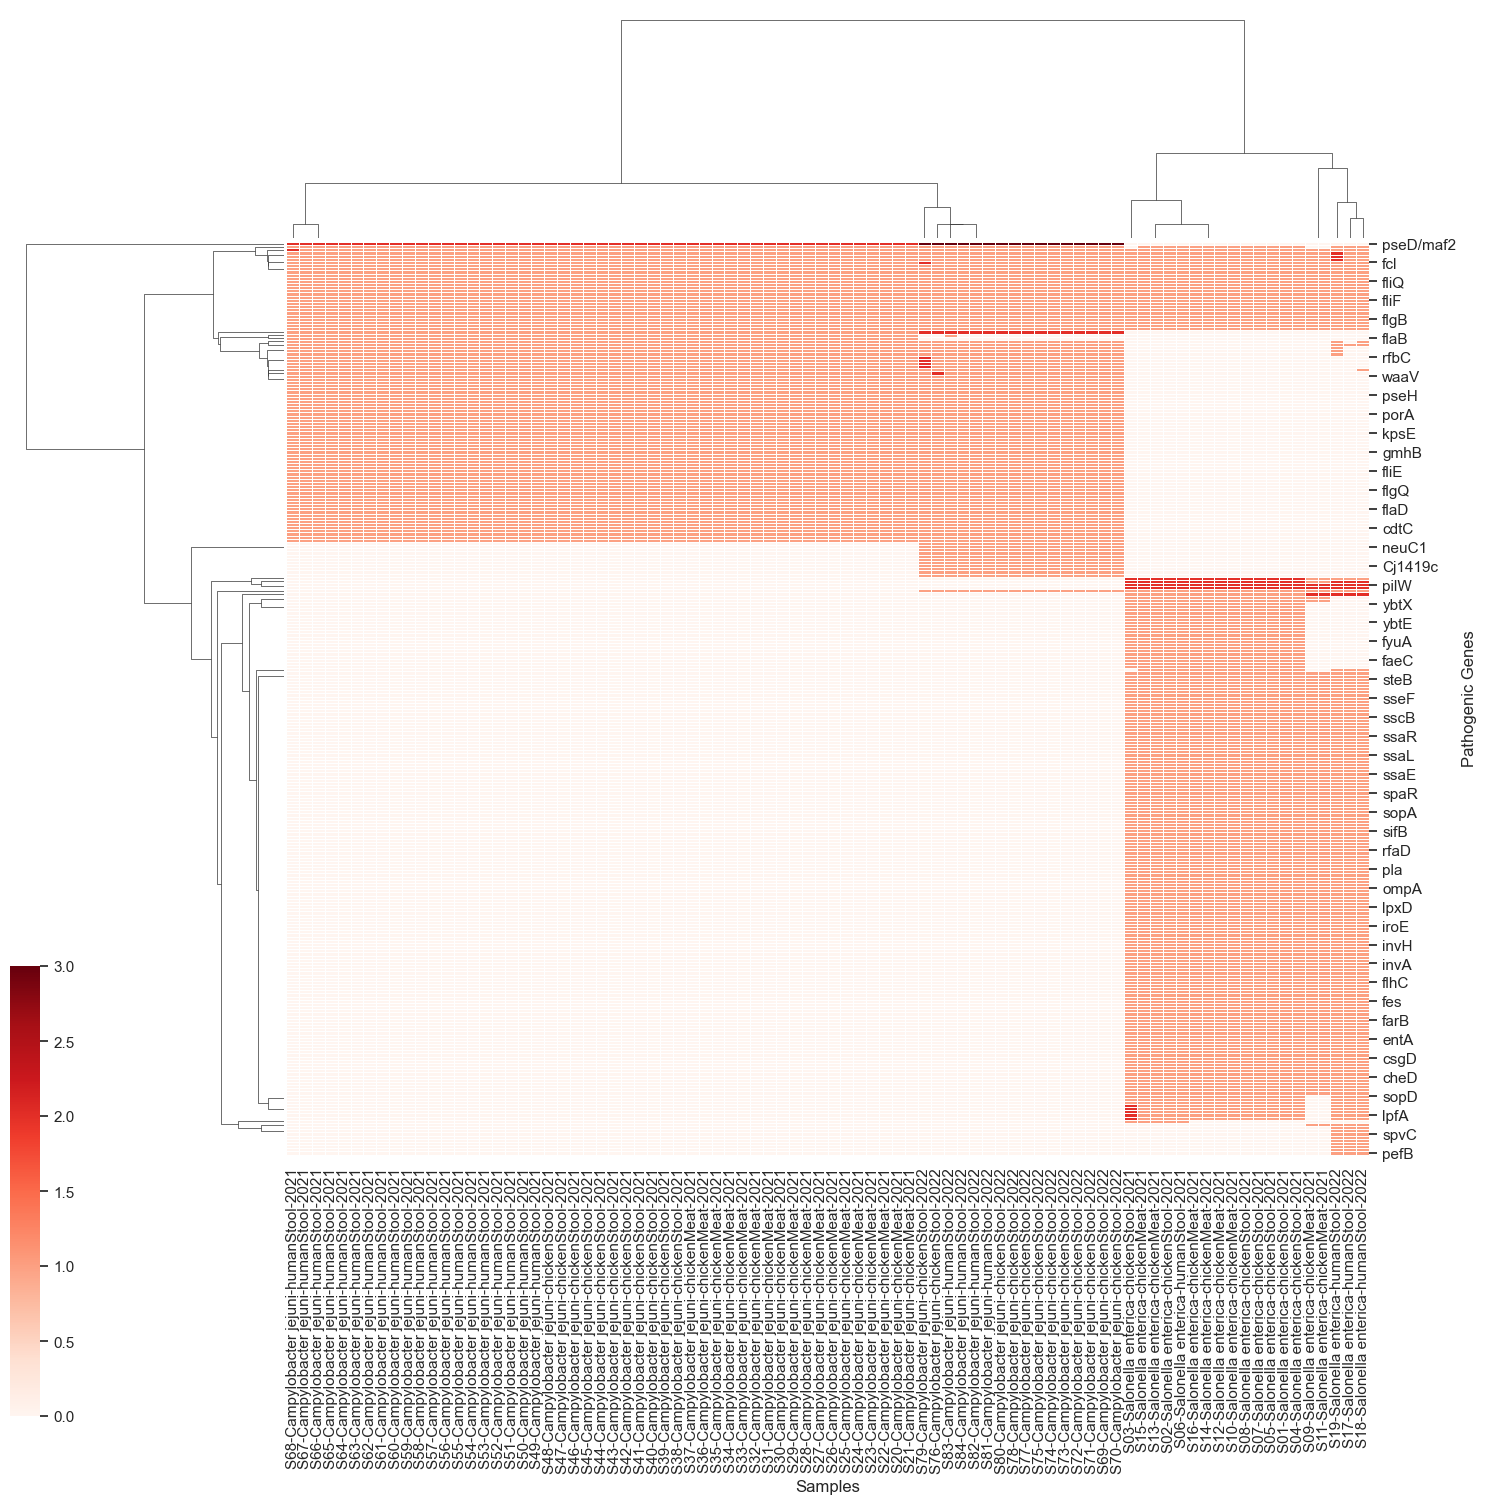

In [4]:

heatmap_db
sns.set(font_scale=1)
g = sns.clustermap(heatmap_db, cmap="Reds", xticklabels=True, row_cluster=True, figsize=(15,15), cbar_pos=(0.01, .05, .02, .3), linewidths=0.5)
ax = g.ax_heatmap
ax.set_ylabel("Pathogenic Genes")
ax.set_xlabel("Samples")
# fig = g.get_figure()
plt.savefig(output_dp / Path("clustermap_pathogenic_genes_vs_samples_palestine.svg"))
plt.savefig(output_dp / Path("clustermap_pathogenic_genes_vs_samples_palestine.png"))

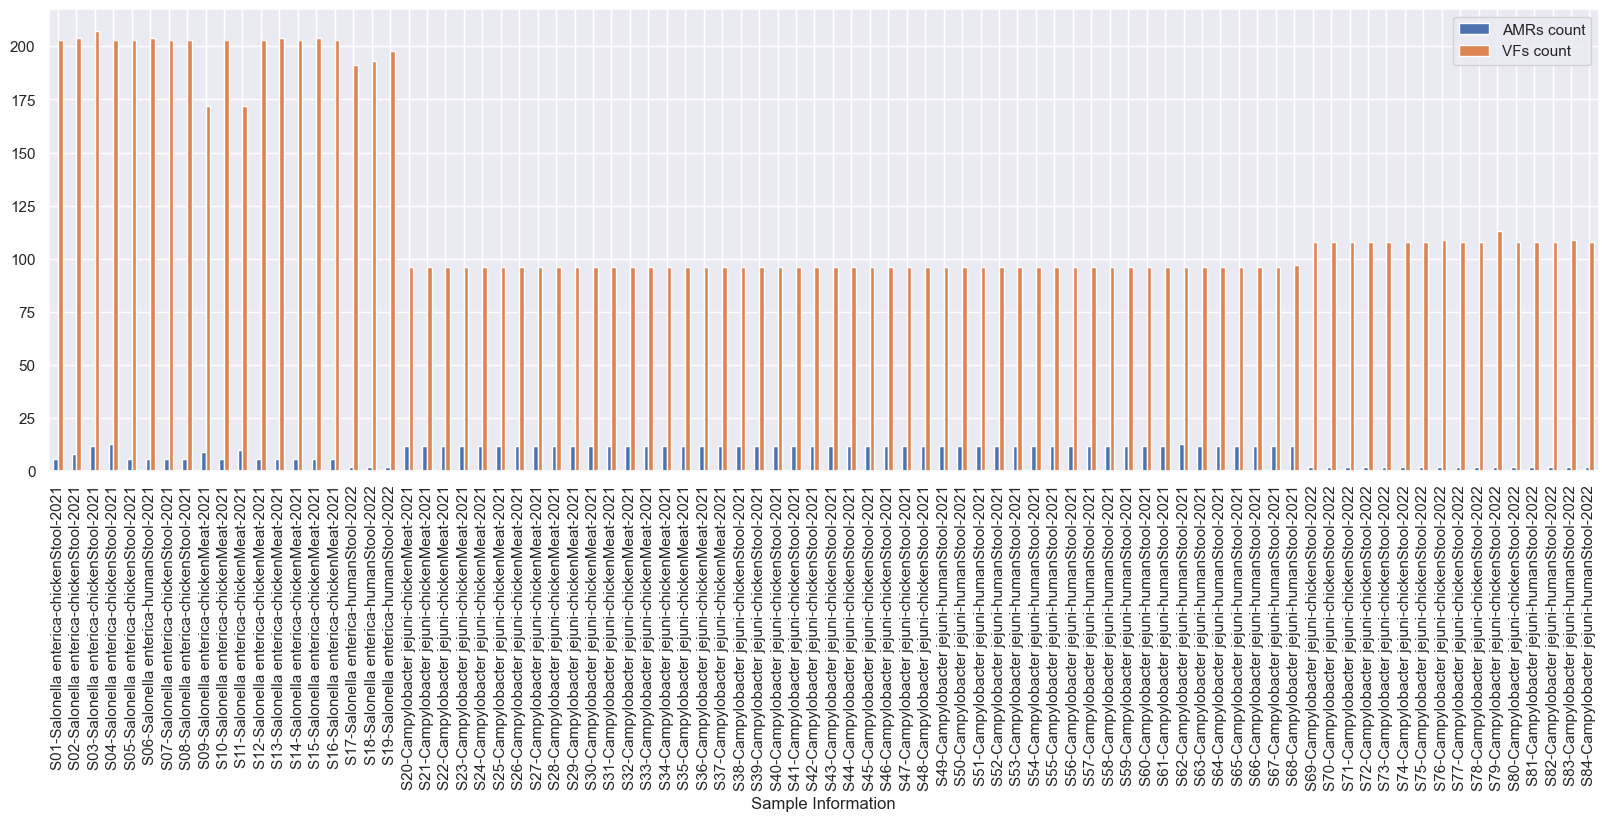

In [5]:


selection = result[(result["AMRs count"] != 0) | (result["VFs count"] != 0)]
selection = selection.dropna(subset = ["AMRs count","VFs count"])

selection.set_index(["Sample Information"], drop=True, inplace = True)
selection.plot( kind = "bar",
                y = ["AMRs count","VFs count"], 
                figsize=(20,6), 
                )
plt.savefig(output_dp / Path("bar_plot_vfs_amrs_counts_vs_Information_palestine.svg"))
plt.savefig(output_dp / Path("bar_plot_vfs_amrs_counts_vs_Information_palestine.png"))
plt.show()

/var/folders/7j/21czvpk170zcyjdbqrp0hmsh0000gn/T/ipykernel_48657/2508960571.py:2: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.swarmplot(y="VFs count", x="Information", data=result, color="white", edgecolor="gray")
/Users/bebatut/miniconda3/envs/pathogfair/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/bebatut/miniconda3/envs/pathogfair/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 33.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


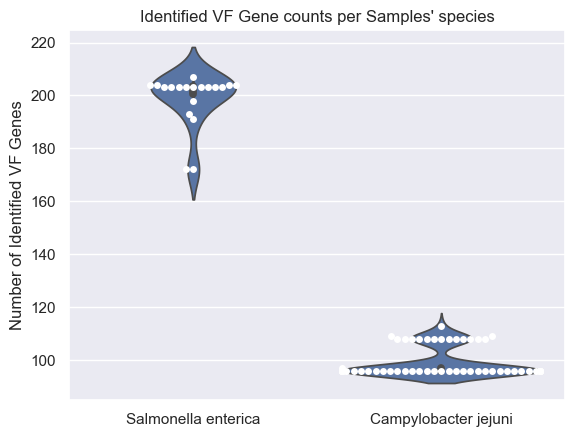

In [6]:
ax = sns.violinplot(data=result, x="Information", y="VFs count")
sns.swarmplot(y="VFs count", x="Information", data=result, color="white", edgecolor="gray")
ax.set_title("Identified VF Gene counts per Samples' species")
ax.set_ylabel("Number of Identified VF Genes")
ax.set_xlabel("")
plt.savefig(output_dp / Path("violin_plot_number_of_VFs_per_species.svg"))
plt.savefig(output_dp / Path("violin_plot_number_of_VFs_per_species.png"))
plt.show()

/var/folders/7j/21czvpk170zcyjdbqrp0hmsh0000gn/T/ipykernel_48657/3866047448.py:2: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.swarmplot(y="AMRs count", x="Information", data=result, color="white", edgecolor="gray")
/Users/bebatut/miniconda3/envs/pathogfair/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 32.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


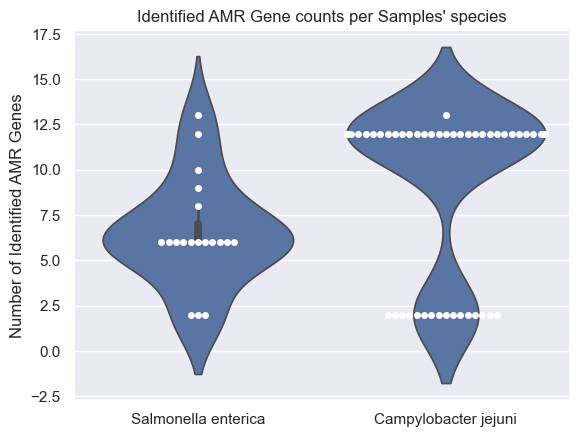

In [7]:
ax = sns.violinplot(data=result, x="Information", y="AMRs count")
sns.swarmplot(y="AMRs count", x="Information", data=result, color="white", edgecolor="gray")
ax.set_title("Identified AMR Gene counts per Samples' species")
ax.set_ylabel("Number of Identified AMR Genes")
ax.set_xlabel("")
plt.savefig(output_dp / Path("violin_plot_number_of_AMRs_per_species.svg"))
plt.savefig(output_dp / Path("violin_plot_number_of_AMRs_per_species.png"))
plt.show()

## Venn Diagram 

/Users/bebatut/miniconda3/envs/pathogfair/lib/python3.13/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/Users/bebatut/miniconda3/envs/pathogfair/lib/python3.13/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

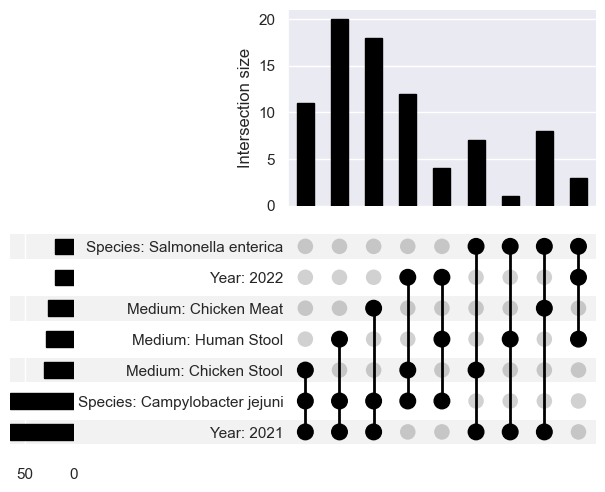

In [8]:


upset_db.head()


categories = list(upset_db.columns[1:len(upset_db.columns)])
palestine_metadata = upset_db[categories].astype(bool)
palestine_metadata = pd.concat([palestine_metadata,
                          upset_db[[col for col in upset_db.columns if col not in categories]]],
                         axis=1).set_index(categories)
palestine_metadata.head()


plt = upset.UpSet(palestine_metadata).plot()




In [9]:
# import widget classes and instantiate Network instance
net = Network(CGM2)

# load matrix file
net.load_file(str(data_dp / Path("heatmap_table_type2.csv")))

# cluster using default parameters
net.cluster(enrichrgram=True)

# make interactive widget
net.widget()

CGM2(network='{"row_nodes": [{"name": "Cj1135", "ini": 289, "clust": 104, "rank": 196, "rankvar": 82}, {"name"…

In [10]:
# load matrix file
net.load_file(str(data_dp / Path("vfs_coverage_heatmap_type2.csv")))

# cluster using default parameters
net.cluster(enrichrgram=True)

# make interactive widget
net.widget()

CGM2(network='{"row_nodes": [{"name": "alga", "ini": 289, "clust": 131, "rank": 16, "rankvar": 42}, {"name": "…